In [2]:
%run SAT_help_functions.ipynb

datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh 2013', 'Dutilh 2019', 'Evans 2017', 'Lerche 2017', 'Rae 2014', 'Wagenmakers 2008']

## Using function to plot

In [2]:


def BIC_to_likelihood(BIC, k, n):
    x = np.exp((-BIC+k*np.log(n))/2)
    if x < np.log(2.2E-308):
        return 2.2E-308
    if x > np.log(1.7E+308):
        return 1.7E+308
    return x

In [70]:
def get_BIC_EJ(model):
    
    df = pd.read_csv("Parameter Estimates/"+model+"resultWagenmakers2008.csv")
    df_n = pd.read_csv("Parameter Estimates/n_Wagenmakers2008.csv")

    df["n"] = df_n["N"]
    df["k"] = [len(df.columns)-5]*len(df)
    print(df.loc[0,"k"])
    df["ll"] = df["BIC"] - df["k"]*np.log(df["n"])

    BIC = np.array(df.groupby('Participant')['ll'].sum() + df.groupby('Participant')['k'].mean()*np.log(df.groupby('Participant')['n'].sum()))
    return BIC

In [58]:
model = "DDM2v2a2ter"
df = pd.read_csv("Parameter Estimates/"+model+"resultWagenmakers2008.csv")
df_n = pd.read_csv("Parameter Estimates/n_Wagenmakers2008.csv")

df["n"] = df_n["N"]
df["k"] = [len(df.columns)-5]*len(df)
df["ll"] = df["BIC"] - df["k"]*np.log(df["n"])

BIC = np.array(df.groupby('Participant')['ll'].sum() + df.groupby('Participant')['k'].mean()*np.log(df.groupby('Participant')['n'].sum()))

In [74]:
df = pd.read_csv("Parameter Estimates/DDM2v2a2Weibull2terresultWagenmakers2008.csv")
df

,Unnamed: 0,Drift Rate Speed,Drift Rate Accuracy,Boundary Separation Speed,aprimeSpeed,lamSpeed,kSpeed,Boundary Separation Accuracy,aprimeAcc,lamAcc,kAcc,Non-decision Time Speed,Non-decision Time Accuracy,BIC,Frequency,Participant
0,0,2.593250,3.318136,1.118918,0.561571,0.112213,3.550878e+00,1.780128,0.046788,0.017332,0.151892,0.293228,0.360421,-239.374496,1,1
1,0,2.249209,1.903532,1.092141,0.173769,0.057463,2.680440e-01,1.029907,0.535433,0.213696,3.962238,0.366184,0.291738,-117.409138,2,1
2,0,0.818228,1.524225,1.012962,0.064707,0.459577,3.001363e-01,1.008002,0.464946,0.111653,1.188523,0.323677,0.350636,7.103192,3,1
3,0,2.323499,2.776816,1.230000,0.062027,0.895260,1.933701e-10,1.379387,0.469295,0.010893,1.382416,0.343146,0.399281,-145.218176,4,1
4,0,2.381239,1.909214,3.824367,0.566288,0.248273,2.247675e+00,2.380000,0.415570,0.344717,2.612836,0.127549,0.127159,-156.258258,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,2.089593,2.349140,1.051698,0.389387,0.237184,2.716410e+00,1.250000,0.770580,0.223656,0.526776,0.278634,0.380189,-199.688904,2,17
92,0,1.503049,1.373224,1.018094,0.436554,0.221498,2.211523e+00,3.987370,0.758379,0.276484,1.998186,0.266043,0.200540,6.437565,3,17
93,0,1.724391,2.095616,1.000195,0.491675,0.240013,3.246482e+00,2.661748,0.938614,0.419020,2.470439,0.260960,0.190208,-129.823989,4,17
94,0,2.082870,2.035871,1.010000,0.461557,0.251110,2.695519e+00,1.523539,0.573471,0.398191,0.918457,0.286625,0.357671,-130.132033,5,17


In [68]:
BIC = np.array(df.groupby('Participant')['ll'].sum() + df.groupby('Participant')['k'].mean()*np.log(df.groupby('Participant')['n'].sum()))

<Axes: xlabel='Frequency', ylabel='Boundary Separation Speed'>

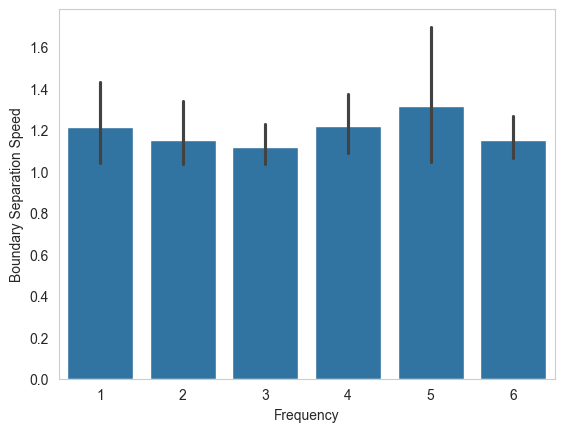

In [75]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation Speed")

<Axes: xlabel='Frequency', ylabel='Boundary Separation Accuracy'>

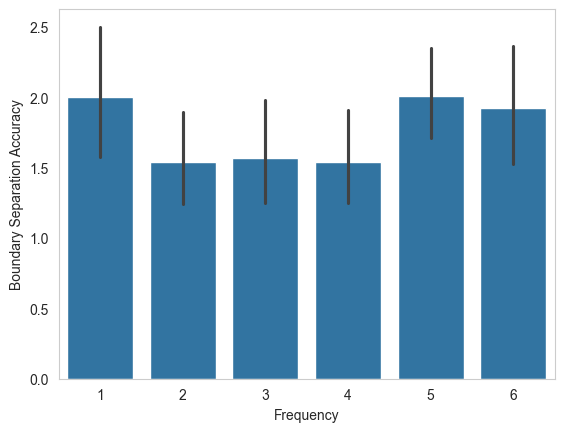

In [76]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation Accuracy")

In [5]:
df = pd.read_csv("Parameter Estimates/OUM2v2k2terresultWagenmakers2008.csv")

<Axes: xlabel='Frequency', ylabel='Boundary Separation'>

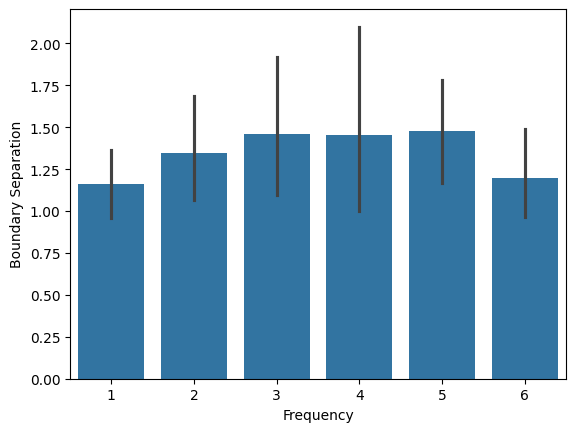

In [6]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation")

In [46]:
def BIC_to_exp(BIC):
    return np.exp(-BIC/2)
def BIC_to_likelihood(BIC, k, n):
    return np.exp((-BIC+k*np.log(n))/2)
#dataset = "Dutilh2019"
#models = ["DDM2v2c2ter","OUM2v2k2ter"] 
#sortby = "OUM2v2k2ter"
def plot_BIC_comparison(ax,dataset, models, sortby = "OUM2v2k2ter"):

    BIC_all = pd.DataFrame(columns = models)
    for model in models:
        if dataset=="Wagenmakers2008":
            BIC_all[model] = get_BIC_EJ(model)
        else:
            if model == "DDM2v1sv2a2ter" or model == "DDMfull":
                bic_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/"+model+"_"
                BIC_all[model] = pd.read_csv(bic_dir+dataset+".csv").astype('float64')[['BIC']]                
            else:
                BIC_all[model] = pd.read_csv("Parameter Estimates/"+model+"result"+dataset+".csv").astype('float64')[['BIC']]
    # solving the numerical issue
    for i in range(len(BIC_all)):
        tmp_max = np.max(np.array(BIC_all.loc[[i]]))
        tmp_min = np.min(np.array(BIC_all.loc[[i]]))
        np_max = -np.log(2.2E-308)/2 # 354
        np_min = -np.log(1.7E+308)/2 # -354

        if tmp_max > np_max and tmp_min < np_min:
            for model in models:
                if BIC_all.loc[i,model] > np_max:
                    BIC_all.loc[i,model] = np_max
                if BIC_all.loc[i,model] < np_min:
                    BIC_all.loc[i,model] = np_min

        elif tmp_max > np_max and tmp_min > np_min:
            dif_max = tmp_max-np_max
            BIC_all.loc[[i]] -= dif_max
        elif tmp_min < np_min and tmp_max < np_max:
            dif_min = tmp_min - np_min
            BIC_all.loc[[i]] -= dif_min

    for model in models:
        BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)

    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]

    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    BIC_all = BIC_all.sort_values(by = sortby, axis = 0)
    BIC_all = BIC_all.reset_index(drop=True)
    BIC_all.index += 1
    if models==["DDM2v2a2ter","OUM2v2k2ter"]:
        color=["#ff7f0e", "#1f77b4"]
    elif models==["OUM2v2a2ter","OUM2v2k2ter"]:
        color=["#a1c9f4",'#1f77b4']
    elif models == ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"]:
        color=["#a1c9f4",'#699ADD','#1f77b4'] #3179C6 88BDDF
    else:
        color=["#F29A2E", "#1f77b4"]
        
    return BIC_all.plot(ax = ax, kind='bar', title = dataset, legend =False, stacked=True, width=1,edgecolor='black'
                        ,color=color)

# DDM vs OUMk    ["#ff7f0e", "#1f77b4"]

# OUMa vs OUMk   ["#a1c9f4",'#1f77b4']

# DDMc vs OUMk   ["#F29A2E", "#1f77b4"]


In [3]:
def plot_all_datasets(models, labels, sortby, xlabelsize=15, titlesize = 20, figsize=(18, 12)):
    figure, axes = plt.subplots(2,3,figsize=figsize)
    plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2013", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[0,1],dataset = "Dutilh2019", models = models, sortby = sortby) # float 128 issue
    plot_BIC_comparison(ax = axes[0,2],dataset = "Evans2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,0],dataset = "Lerche2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,1],dataset = "Rae2014", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, sortby = sortby) # float 128 issue
    
    axes[0,0].set_title("Dutilh2013",fontsize = titlesize)
    axes[0,1].set_title("Dutilh2019",fontsize = titlesize)
    axes[0,2].set_title("Evans2017",fontsize = titlesize)
    axes[1,0].set_title("Lerche2017",fontsize = titlesize)
    axes[1,1].set_title("Rae2014",fontsize = titlesize)
    axes[1,2].set_title("Wagenmakers2008",fontsize = titlesize)
    axes[1,0].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,1].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,2].set_xlabel("Participants", fontsize = xlabelsize)

    axes[0,2].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1))

In [47]:
def plot_all_datasets_flat(models, labels, sortby, xlabelsize=15, titlesize = 20, figsize=(30, 4)):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_BIC_comparison(ax = axes[i],dataset = datasets[i], models = models, sortby = sortby)
        axes[i].set_title(dataset_names[i],fontsize = titlesize, fontweight='bold', fontname='Arial')
        axes[i].set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
        axes[i].set_ylim(0,1)
        axes[i].tick_params(axis='both', which='major', labelsize=7)
    axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10)


6
7


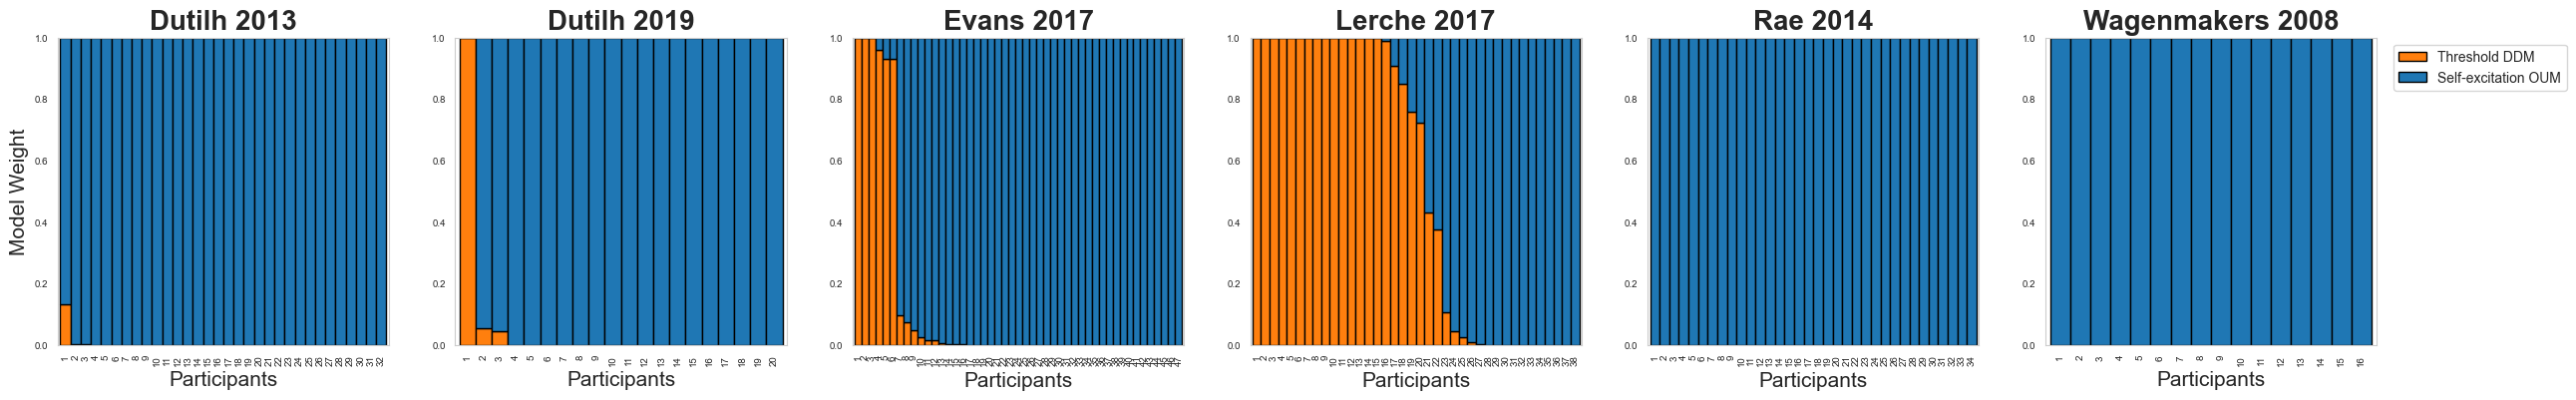

In [71]:
models = ["DDM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold DDM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

7
7


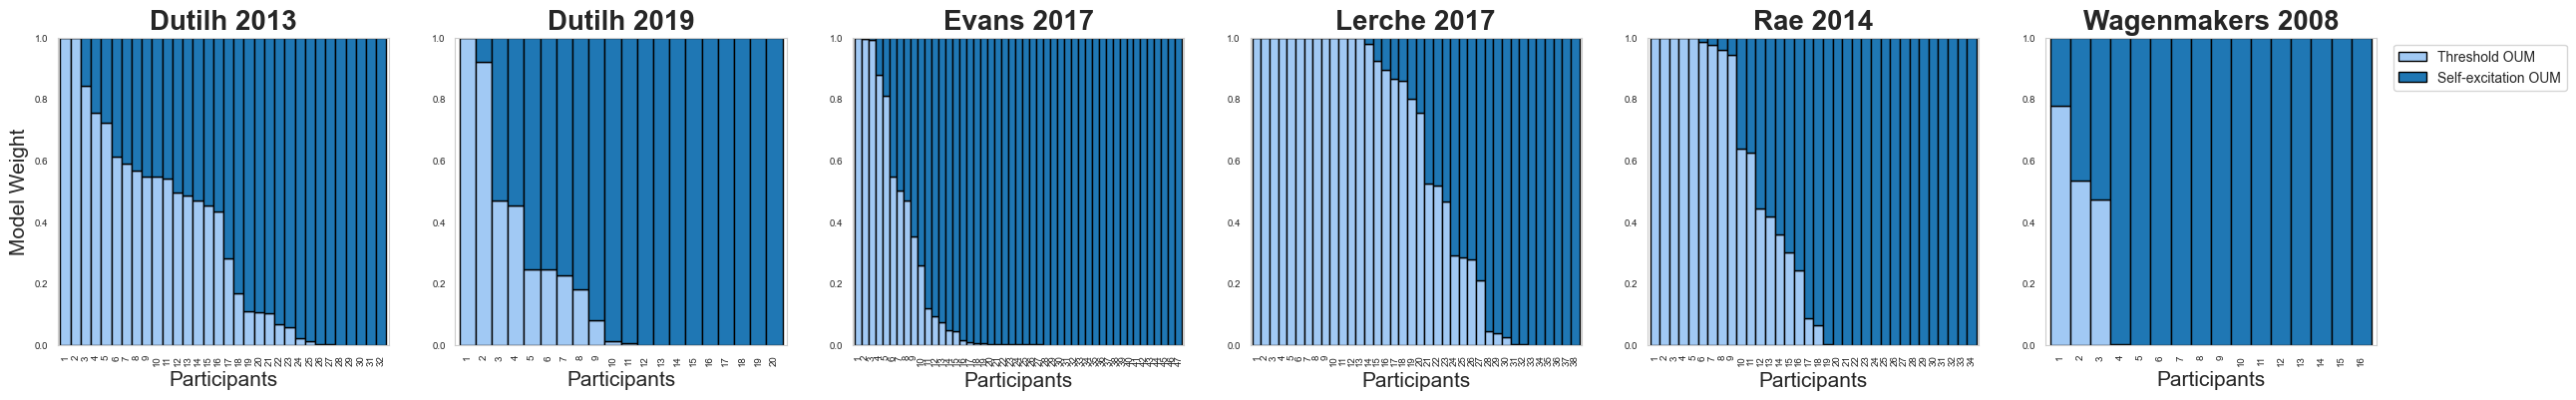

In [72]:
models = ["OUM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold OUM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

12
7


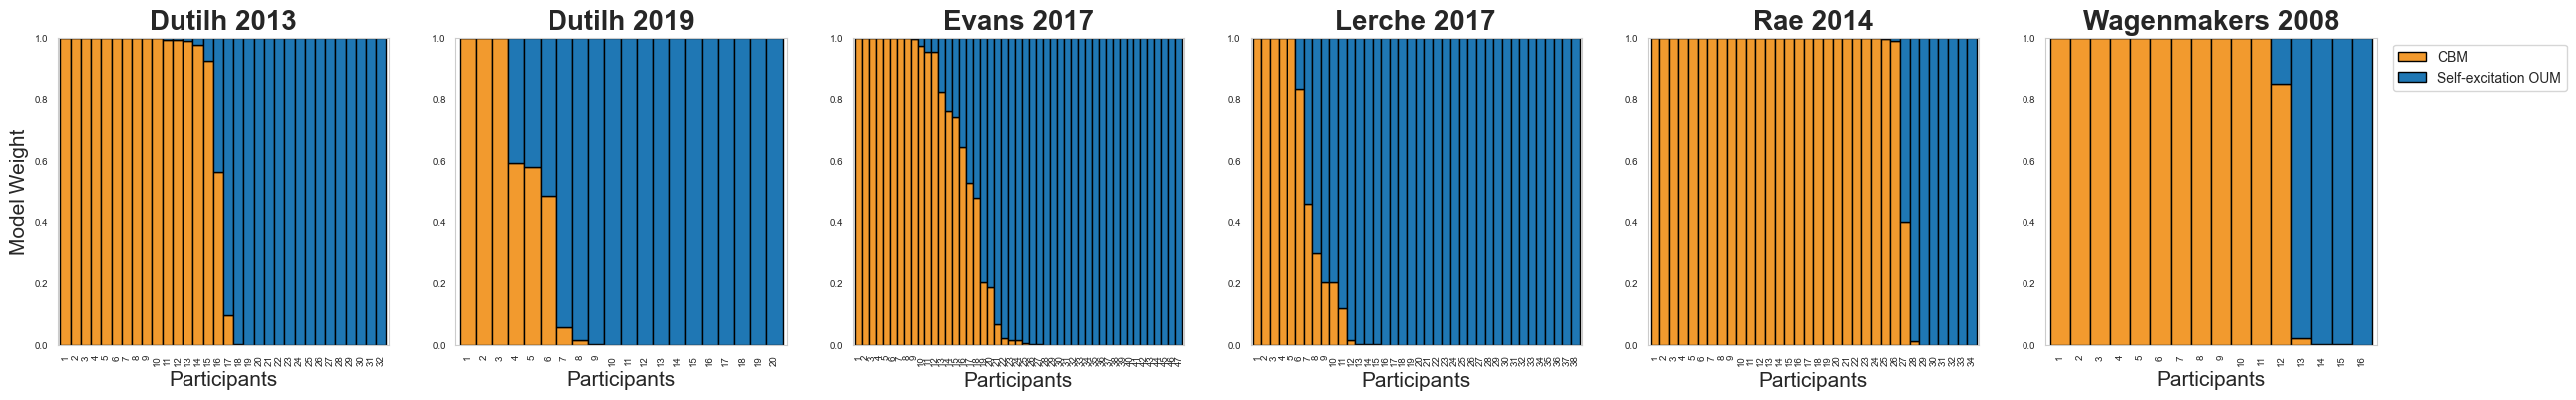

In [73]:
models = ["DDM2v2a2Weibull2ter","OUM2v2k2ter"] 
labels = ["CBM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

## Supplementary materials

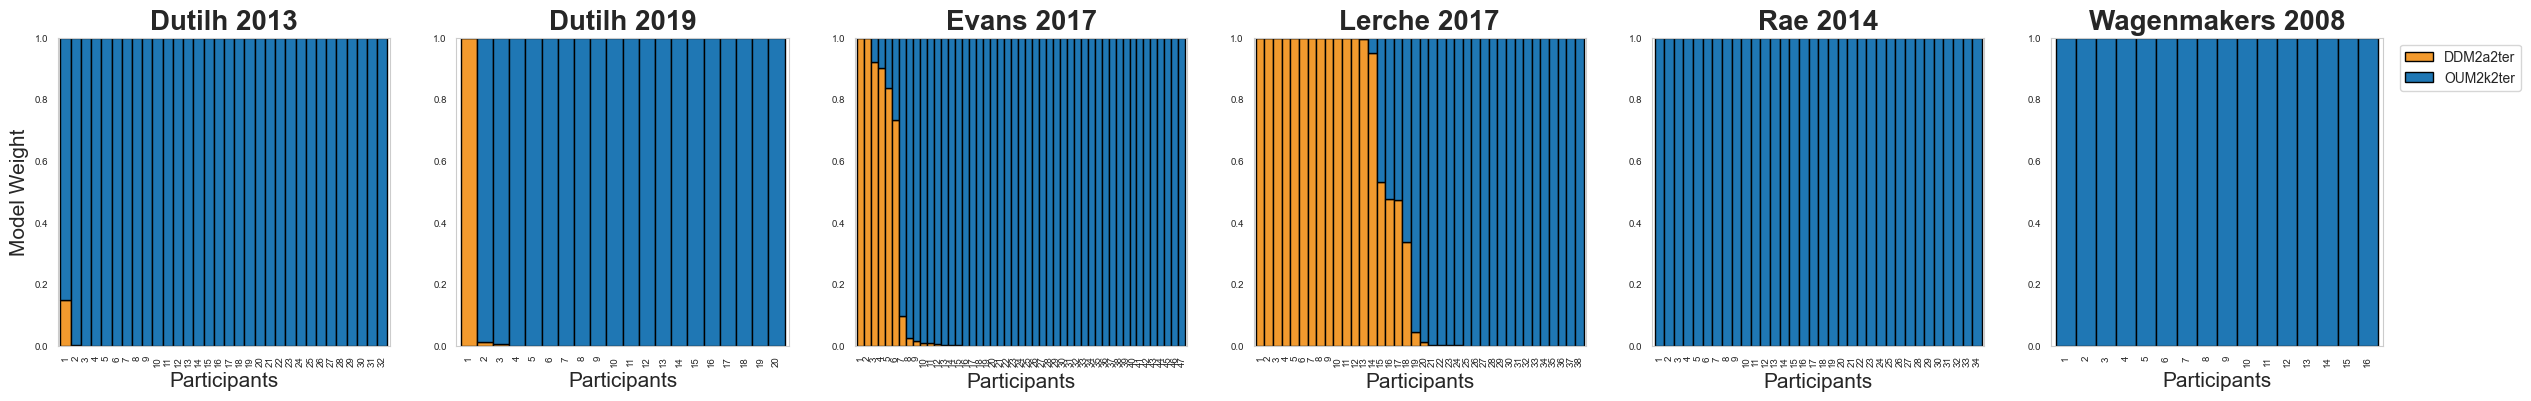

In [51]:
models = ["DDM2a2ter","OUM2k2ter"] 
labels = ["DDM2a2ter","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

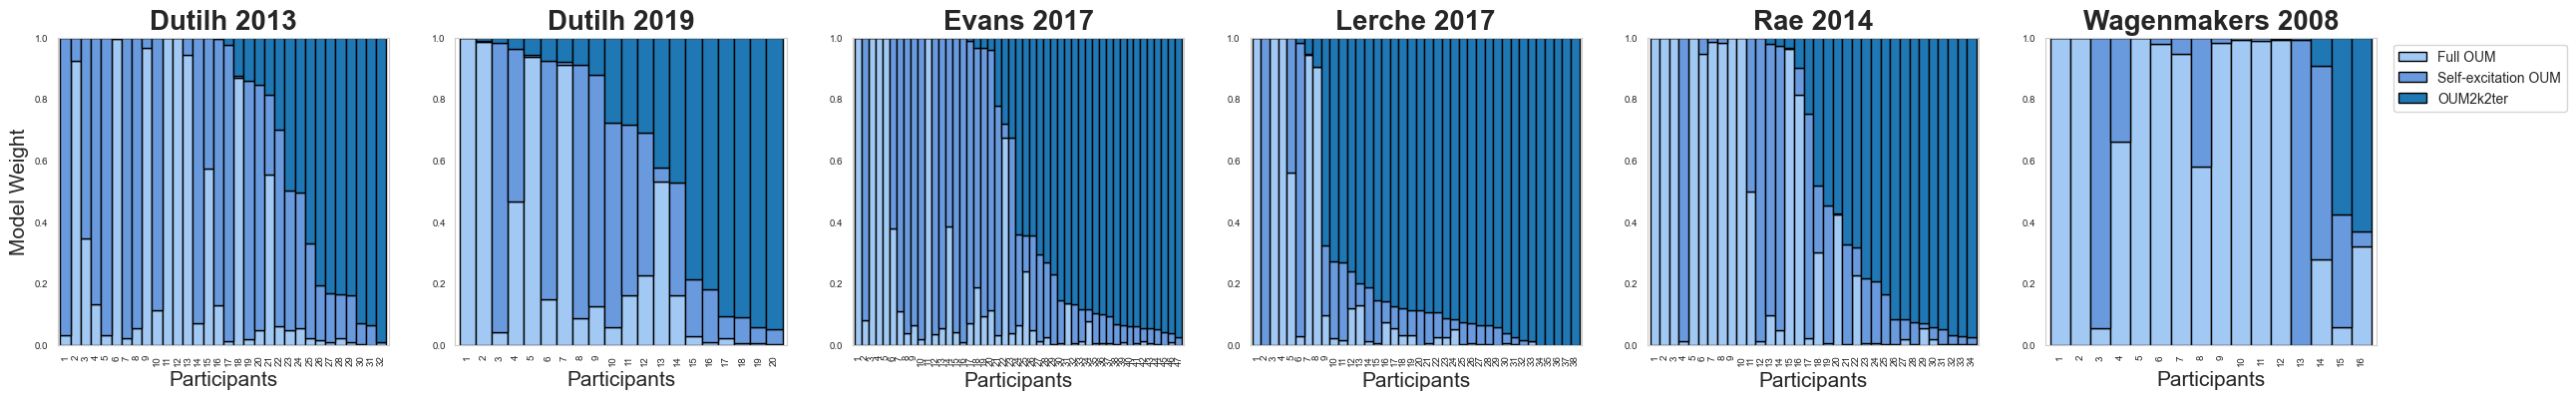

In [52]:
models = ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"] 
labels = ["Full OUM","Self-excitation OUM","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

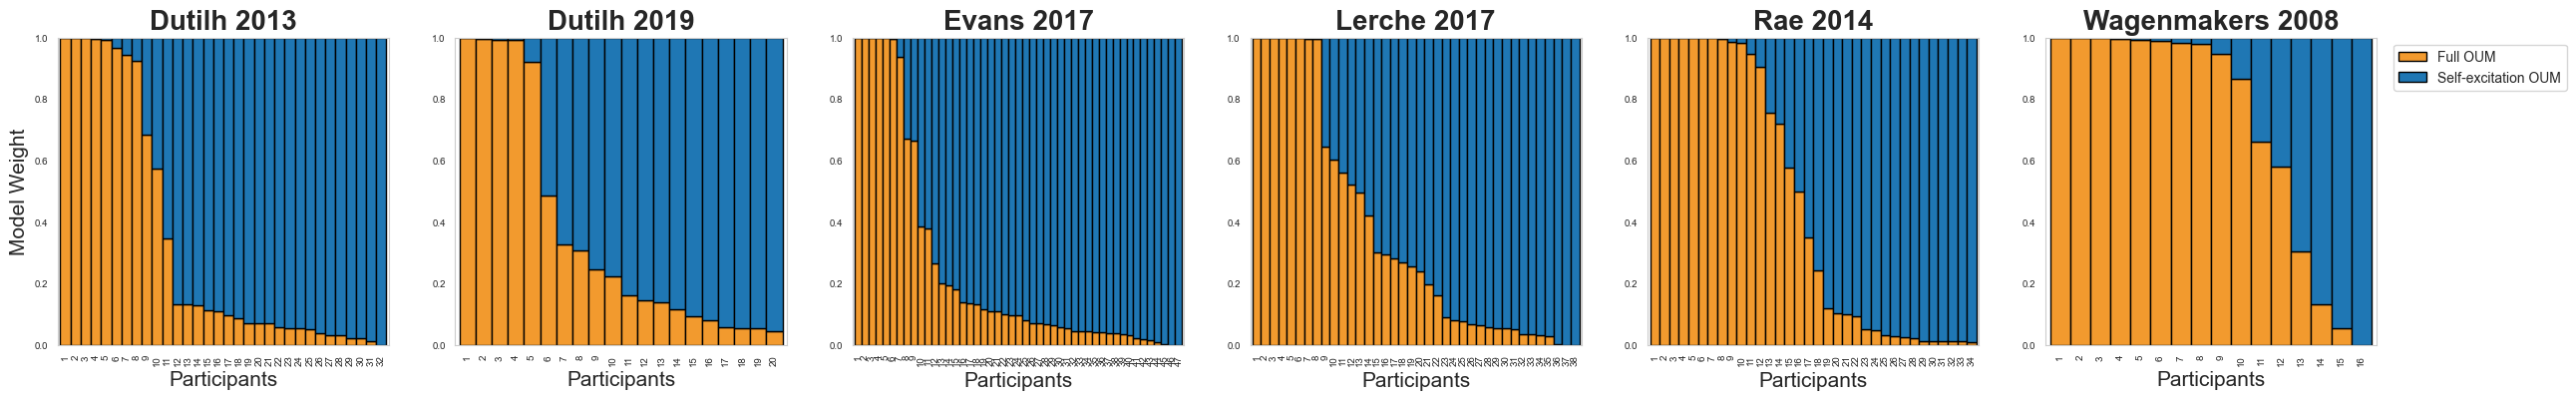

In [53]:
models = ["OUM2v2a2k2ter","OUM2v2k2ter"] 
labels = ["Full OUM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

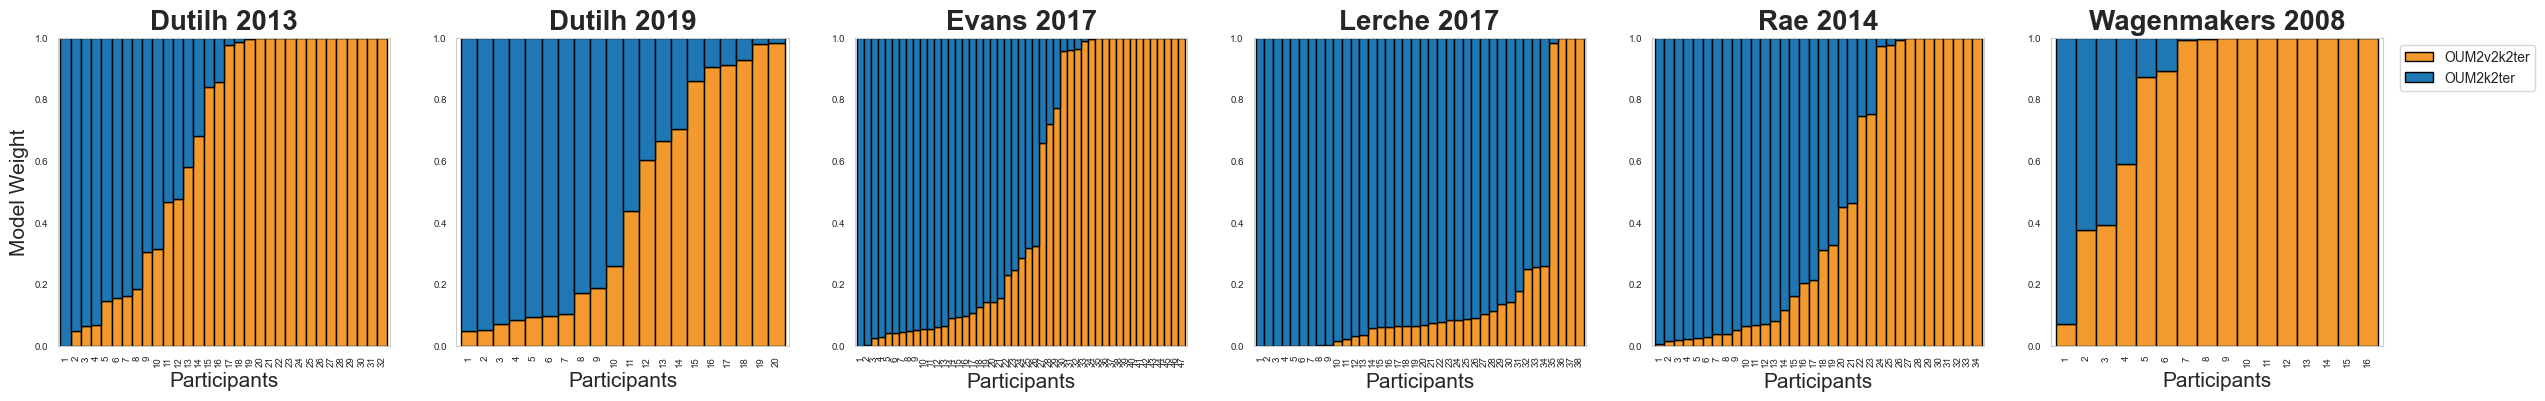

In [54]:
models = ["OUM2v2k2ter","OUM2k2ter"] 
labels = ["OUM2v2k2ter","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

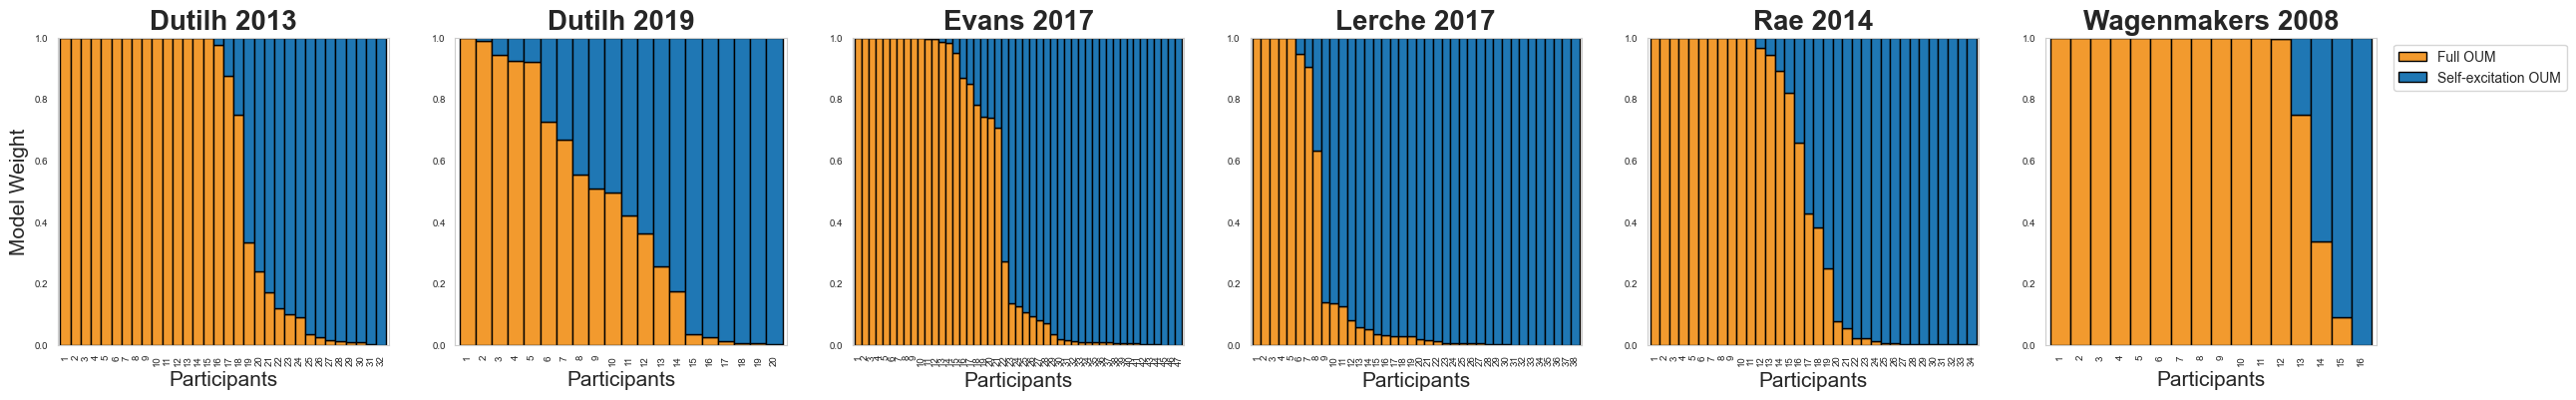

In [55]:
models = ["OUM2v2a2k2ter","OUM2k2ter"] 
labels = ["Full OUM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

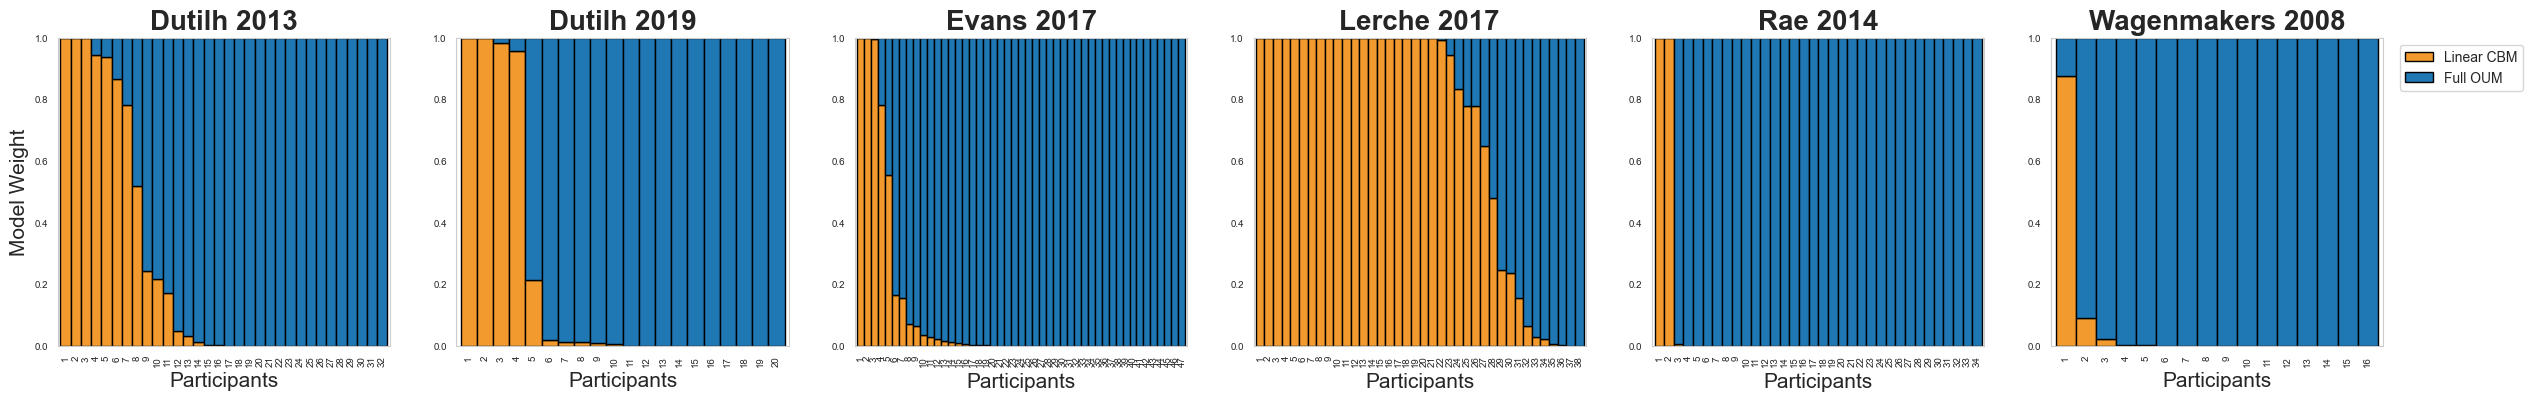

In [56]:
models = ["DDM2v2a2c2ter","OUM2v2k2ter"] 
labels = ["Linear CBM","Full OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

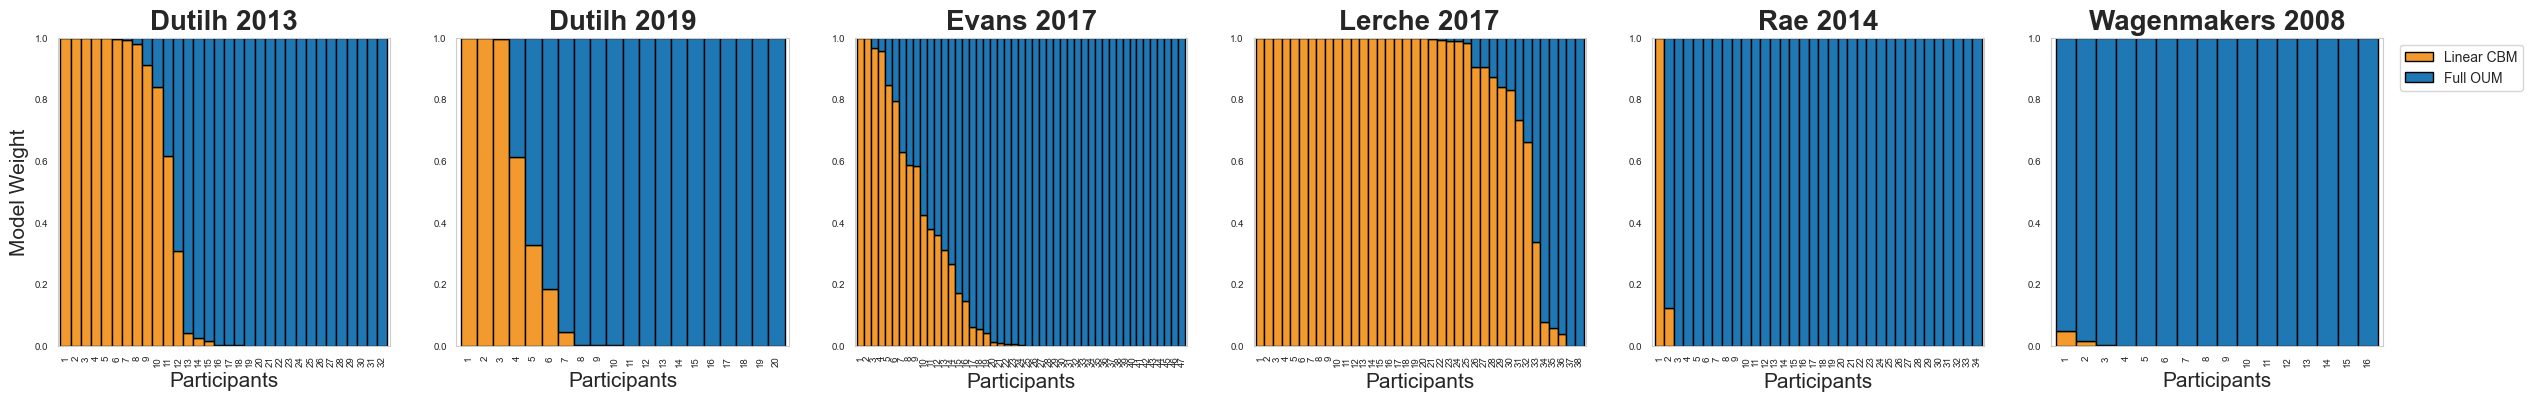

In [57]:
models = ["DDM2v2a2c2ter","OUM2v2a2k2ter"] 
labels = ["Linear CBM","Full OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2a2k2ter")

In [78]:
pal = sns.color_palette()

In [98]:
pal.as_hex()[0]


'#1f77b4'

In [141]:
def get_Weibull(t,a=2,a_prime=1.5,lam=1,k=3):
    first = 1-np.exp(-(t/lam)**k)
    second = a - a_prime
    return (a - first*second)

In [144]:
def plot_boundary(ax,dataset):
    
    if ax is None:
        ax = plt.gca()
    T_dur = 1.5
    
    t = np.arange(0,5,0.01)
    param = pd.read_csv("Parameter Estimates/DDM2v2a2Weibull2terresult"+dataset+".csv")             
    param_mean = param.mean(axis=0)
    a_speed = get_Weibull(t,a=param_mean["Boundary Separation Speed"],
                           a_prime=param_mean["aprimeSpeed"],
                           lam=param_mean["lamSpeed"],k=3)
    a_acc = get_Weibull(t,a=param_mean["Boundary Separation Accuracy"],
                           a_prime=param_mean["aprimeAcc"],
                           lam=param_mean["lamAcc"],k=3)
    #['#1f77b4', '#ff7f0e'
    ax.plot(t, a_speed, color="#1f77b4")
    ax.plot(t, a_acc, color="#ff7f0e")
    ax.plot(t, -a_speed, color="#1f77b4")
    ax.plot(t, -a_acc, color="#ff7f0e")
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.axis('off')

    t_max = next(a[0] for a in enumerate(a_acc) if a[1]-param_mean["aprimeAcc"] < 0.001)
    ax.set_xlim(0,t[t_max])

    #ax.legend(["Boundary (Speed)", "Boundary (Accuracy)"])
    
    #return ax


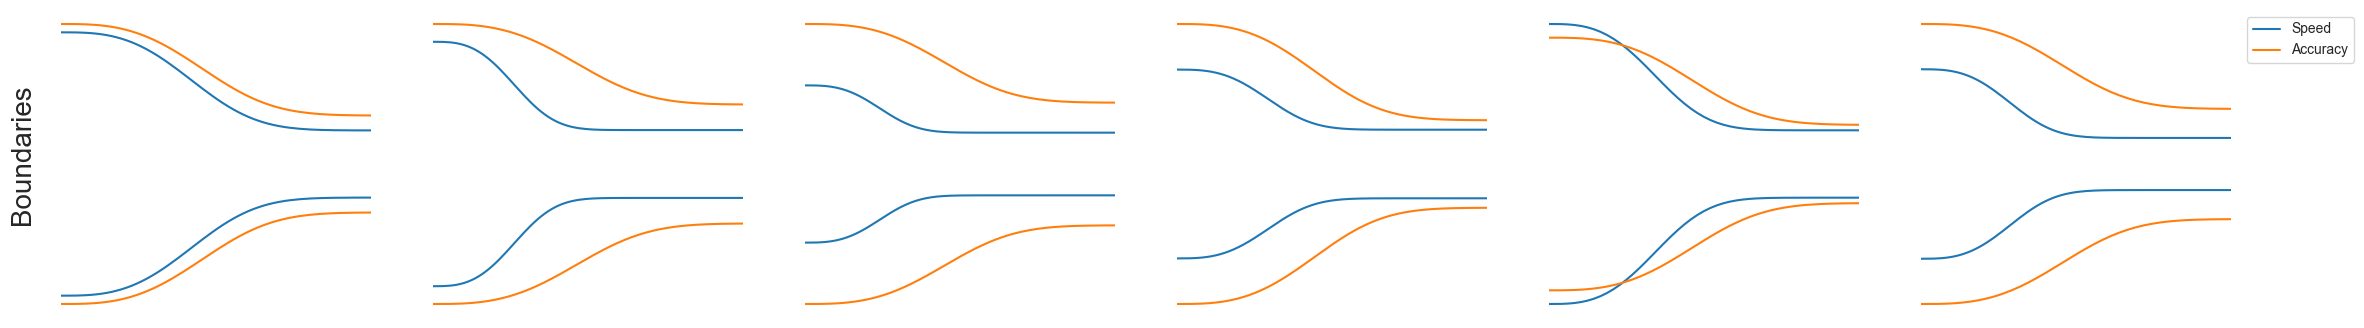

In [145]:
def plot_all_boundaries(xlabelsize=15, titlesize = 20, figsize=(28, 4)):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_boundary(ax = axes[i],dataset = datasets[i])
        axes[i].set_title("")
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, fontweight='bold', fontname='Arial')
        #axes[i].set_xlabel("Time", fontsize = xlabelsize, fontname='Arial')
        #axes[i].set_xlim(0,t_max)
        #axes[i].set_ylim(0,3.5)
        axes[i].set_ylabel("Boundaries")
        axes[i].tick_params(axis='both', which='major', labelsize=7)
        
    axes[0].text(x=-0.1, y=-0.5,s="Boundaries",size=20, rotation = "vertical")

    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10)
plot_all_boundaries()

In [147]:
Frequencies = [1,  2, 3,  4,  5,  6]
participants = [1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]
df = pd.read_csv("/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Wagenmakers2008/SpeedAccData_new.csv")
df

,Unnamed: 0.1,Unnamed: 0,Participant,Block,Practice,Cond,Stimulus,Frequency,Response,Time,Censor,Correct
0,0,894,1,10,0,Accuracy,5798,5,1,0.734,0.0,0
1,1,895,1,10,0,Accuracy,6554,6,0,0.536,0.0,1
2,2,896,1,10,0,Accuracy,1177,1,1,0.514,0.0,1
3,3,897,1,10,0,Accuracy,4796,4,0,0.466,0.0,1
4,4,898,1,10,0,Accuracy,1299,1,1,0.446,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22020,22020,32027,17,20,0,Accuracy,3232,3,1,0.637,0.0,1
22021,22021,32028,17,20,0,Accuracy,4696,4,0,0.584,0.0,1
22022,22022,32029,17,20,0,Accuracy,2574,2,1,0.824,0.0,1
22023,22023,32030,17,20,0,Accuracy,6334,6,0,0.739,0.0,1


In [149]:
save_dif = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Wagenmakers2008/dataByFreq/"

In [154]:
for i in Frequencies:
    for j in range(len(participants)):
        d = df[df["Frequency"]==i]
        d = d[d["Participant"]==participants[j]]
        d.to_csv(save_dif+"Freq"+str(i)+"/sub"+str(j+1)+".csv")